In [1]:
# IMPORTAR BIBLIOTECAS
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
%matplotlib inline
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
# FUNÇÕES
def transformar_sexo(valor):
    if valor == "female":
        return 1
    else:
        return 0

In [3]:
#LER OS ARQUIVOS DE TREINO E TESTE
train  = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

#MAPEAR A VARIÁVEL "Sex_binário" PARA SER PREENCHIDA COM OS DADOS DA COLUNA "SEX"
train["Sex_binario"] = train["Sex"].map(transformar_sexo)
test["Sex_binario"] = test["Sex"].map(transformar_sexo)

# CRIAR LISTA COM VARIÁVEIS
variaveis = ["Sex_binario", "Age"]

# PREENCHER TODAS AS COLUNAS QUE NÃO ESTÃO COM DADOS, CRIAR COLUNA "Survived"
# E DEFINIR NOSSAS COLUNAS DE TREINO.
X = train[variaveis].fillna(-1)
y = train["Survived"]

In [5]:
# MOSTRAR INICIO DOS DADOS
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [6]:
#CRIAR MODELO
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)

In [6]:
#CONTAR QUANTIDADE DE HOMENS E MULHERES NA COLUNA "Sex"
pd.value_counts(train["Sex"])

male      577
female    314
Name: Sex, dtype: int64

In [7]:
# MOSTRAR DADOS DE TREINO
X.head()

,Sex_binario,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


In [8]:
# ENCAIXAR NODDO MODELO NOS DADOS
modelo.fit(X, y)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [9]:
# CRIAR VARIAVEIS DE TESTE
variaveis = ["Sex_binario", "Age"]
X_prev = test[variaveis]
X_prev = X_prev.fillna(-1)

X_prev.head()

,Sex_binario,Age
0,0,34.5
1,1,47.0
2,0,62.0
3,0,27.0
4,1,22.0


### PREVÊ NOSSA VARIÁVEL E INDEXAÇÃO

In [10]:
# PREVÊ, INDEXAR MODELO E CRIAR SUBMISSION
p = modelo.predict(X_prev)
sub = pd.Series(p, index=test["PassengerId"], name="Survived")

In [11]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_binario'],
      dtype='object')

In [12]:
sub.shape

(418,)

In [13]:
# SALVAR MODELO
sub.to_csv("Primeiro_modelo.csv", header="True")

In [14]:
# VERIFICAR PRIMEIRAS 10 LINHAS DO MODELO PRONTO
!head -n10 Primeiro_modelo.csv

PassengerId,Survived
892,0
893,1
894,0
895,1
896,1
897,0
898,1
899,0
900,1


In [15]:
# DEFINIR SEED PARA FIXAR AMOSTRAS, DIVIDIR DADOS E DEFINIR VARIÁVEIS PARA VALIDAÇÃO. 
np.random.seed(0)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.5)

In [16]:
X_train.head()

,Sex_binario,Age
213,0,30.0
586,0,47.0
499,0,24.0
821,0,27.0
246,1,25.0


In [17]:
# ENCAIXE DO MODELO PARA VALIDAÇÃO
modelo.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [18]:
# PREVÊ MODELO DE VALIDAÇÃO
p = modelo.predict(X_valid)

In [19]:
# DEFINIR ACURÁCIA
np.mean(y_valid == p)

0.7690582959641256

In [20]:
# CRIANDO ARRANJO PARA TESTES
X_falso = np.arange(1,10)
X_falso

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [45]:
# TENTANDO MELHORAR NOSSO MODELO INCLUINDO MAIS VARIÁVEIS
variaveis = ['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 
             'Fare']

In [46]:
# DEFINIR VARIAVEIS 'X' E 'Y' PARA TREINAR NOVO MODELO
X = train[variaveis].fillna(-1)
y = train['Survived']

In [5]:
# DEFINIÇÃO DE VALIDAÇÃO CRUZADA K-FOLD
resultados = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=9)

for linhas_treino, linhas_valid in kf.split(X):
    print("Treino:", linhas_treino.shape[0])
    print("Validação:", linhas_valid.shape[0])

    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

    modelo = RandomForestClassifier(n_estimators=100,
                                    n_jobs=-1,
                                    random_state=0)
    modelo.fit(X_treino, y_treino)

    p = modelo.predict(X_valid)

    acc = np.mean(y_valid == p)
    resultados.append(acc)
    print("Acurácia:", acc)
    print()

Treino: 445
Validação: 446
Acurácia: 0.7623318385650224

Treino: 446
Validação: 445
Acurácia: 0.7842696629213484

Treino: 445
Validação: 446
Acurácia: 0.7600896860986547

Treino: 446
Validação: 445
Acurácia: 0.7595505617977528

Treino: 445
Validação: 446
Acurácia: 0.7668161434977578

Treino: 446
Validação: 445
Acurácia: 0.7685393258426966

Treino: 445
Validação: 446
Acurácia: 0.742152466367713

Treino: 446
Validação: 445
Acurácia: 0.7685393258426966

Treino: 445
Validação: 446
Acurácia: 0.7466367713004485

Treino: 446
Validação: 445
Acurácia: 0.7415730337078652

Treino: 445
Validação: 446
Acurácia: 0.7623318385650224

Treino: 446
Validação: 445
Acurácia: 0.7415730337078652

Treino: 445
Validação: 446
Acurácia: 0.7623318385650224

Treino: 446
Validação: 445
Acurácia: 0.755056179775281

Treino: 445
Validação: 446
Acurácia: 0.7869955156950673

Treino: 446
Validação: 445
Acurácia: 0.748314606741573

Treino: 445
Validação: 446
Acurácia: 0.7556053811659192

Treino: 446
Validação: 445
Acuráci

In [24]:
# MOSTRAR RESULTADOS DA VALIDAÇÃO CRUZADA
resultados

[0.7869955156950673,
 0.7797752808988764,
 0.827354260089686,
 0.8179775280898877,
 0.7847533632286996,
 0.7842696629213484,
 0.8161434977578476,
 0.7842696629213484,
 0.8004484304932735,
 0.8,
 0.8183856502242153,
 0.802247191011236,
 0.8116591928251121,
 0.8067415730337079,
 0.820627802690583,
 0.7887640449438202,
 0.8385650224215246,
 0.8044943820224719,
 0.7982062780269058,
 0.8112359550561797]

In [75]:
# MÉDIA DA VALIDAÇÃO CRUZADA
np.mean(resultados)

0.7590338590215145

(array([3., 3., 2., 2., 5., 3., 0., 0., 0., 2.]),
 array([0.74157303, 0.74611528, 0.75065753, 0.75519978, 0.75974203,
        0.76428427, 0.76882652, 0.77336877, 0.77791102, 0.78245327,
        0.78699552]),
 <BarContainer object of 10 artists>)

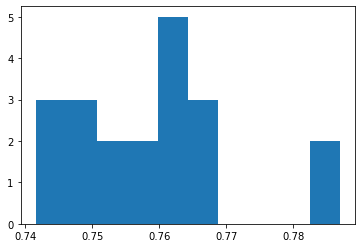

In [76]:
# CRIAÇÃO DE HISTOGRAMA COM OS RESULTADOS
pylab.hist(resultados)

In [77]:
# RETREINAR NOSSO MODELO PARA APLICAR NOSSO TESTE COM A VALIDAÇÃO
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
modelo.fit(X, y)

p = modelo.predict(test[variaveis].fillna(-1))

In [78]:
train.iloc[linhas_valid]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1


In [6]:
#Criar coluna 'p' com dados da validação
X_valid_check = train.iloc[linhas_valid].copy()
X_valid_check['p'] = p

In [8]:
X_valid_check.shape

(445, 14)

In [9]:
# Verificação de erros // dados da coluna survived onde são diferentes da coluna 'p'
# Previsões erradas do nosso modelo
erros = X_valid_check[X_valid_check['Survived'] != X_valid_check['p']]
erros = erros[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
             'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_binario', 'p', 'Survived']]
erros.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p,Survived
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,1
14,15,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,1,1,0
17,18,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,0,0,1
18,19,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S,1,1,0
21,22,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,0,0,1


In [10]:
mulheres = erros[erros['Sex'] == 'female']
homens = erros[erros['Sex'] == 'male']

In [11]:
mulheres.sort_values("Survived")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p,Survived
404,405,3,"Oreskovic, Miss. Marija",female,20.0,0,0,315096,8.6625,NaN,S,1,1,0
885,886,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,1,1,0
409,410,3,"Lefebre, Miss. Ida",female,NaN,3,1,4133,25.4667,NaN,S,1,1,0
423,424,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",female,28.0,1,1,347080,14.4000,NaN,S,1,1,0
436,437,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,W./C. 6608,34.3750,NaN,S,1,1,0
474,475,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S,1,1,0
485,486,3,"Lefebre, Miss. Jeannie",female,NaN,3,1,4133,25.4667,NaN,S,1,1,0
501,502,3,"Canavan, Miss. Mary",female,21.0,0,0,364846,7.7500,NaN,Q,1,1,0
534,535,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S,1,1,0
567,568,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S,1,1,0


In [12]:
homens.sort_values("Survived")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p,Survived
463,464,2,"Milling, Mr. Jacob Christian",male,48.0,0,0,234360,13.0000,NaN,S,0,1,0
594,595,2,"Chapman, Mr. John Henry",male,37.0,1,0,SC/AH 29037,26.0000,NaN,S,0,1,0
386,387,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S,0,1,0
731,732,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,NaN,C,0,1,0
137,138,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,446,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S,0,0,1
453,454,1,"Goldenberg, Mr. Samuel L",male,49.0,1,0,17453,89.1042,C92,C,0,0,1
455,456,3,"Jalsevac, Mr. Ivan",male,29.0,0,0,349240,7.8958,NaN,C,0,0,1
484,485,1,"Bishop, Mr. Dickinson H",male,25.0,1,0,11967,91.0792,B49,C,0,0,1


In [13]:
# CRIAÇÃO DE NOVAS VARIAVEIS PARA ANALISE
train['Embarked_S'] = (train['Embarked'] == 'S').astype(int)
train['Embarked_C'] = (train['Embarked'] == 'C').astype(int)
# train['Embarked_Q'] = (train['Embarked'] == 'Q').astype(int)

train['Cabine_nula'] = train['Cabin'].isnull().astype(int)

train['Nome_contem_Miss'] = train['Name'].str.contains("Miss").astype(int)
train['Nome_contem_Mrs'] = train['Name'].str.contains("Mrs").astype(int)

train['Nome_contem_Master'] = train['Name'].str.contains("Master").astype(int)
train['Nome_contem_Col'] = train['Name'].str.contains("Col").astype(int)
train['Nome_contem_Major'] = train['Name'].str.contains("Major").astype(int)
train['Nome_contem_Mr'] = train['Name'].str.contains("Mr").astype(int)


In [16]:
variaveis

['Sex_binario',
 'Age',
 'Pclass',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked_S',
 'Embarked_C',
 'Cabine_nula',
 'Nome_contem_Miss',
 'Nome_contem_Mrs',
 'Nome_contem_Master',
 'Nome_contem_Col',
 'Nome_contem_Major',
 'Nome_contem_Mr']

In [15]:
variaveis = ['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 
             'Fare', 'Embarked_S', 'Embarked_C', 'Cabine_nula', 'Nome_contem_Miss',
             'Nome_contem_Mrs', 'Nome_contem_Master', 'Nome_contem_Col',
             'Nome_contem_Major', 'Nome_contem_Mr']

X = train[variaveis].fillna(-1)
y = train['Survived']

In [17]:
# DEFINIÇÃO DE VALIDAÇÃO APOS INCLUSÃO DE NOVAS VARIAVEIS PARA COMPARAR COM MODELO ANTERIOR
resultados3 = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_treino, linhas_valid in kf.split(X):
    print("Treino:", linhas_treino.shape[0])
    print("Validação:", linhas_valid.shape[0])
    
    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]
    
    modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    modelo.fit(X_treino, y_treino)
    
    p = modelo.predict(X_valid)
    
    acc = np.mean(y_valid == p)
    resultados3.append(acc)
    print("Acurácia:", acc)
    print()

Treino: 445
Validação: 446
Acurácia: 0.7690582959641256

Treino: 446
Validação: 445
Acurácia: 0.7910112359550562

Treino: 445
Validação: 446
Acurácia: 0.8228699551569507

Treino: 446
Validação: 445
Acurácia: 0.8

Treino: 445
Validação: 446
Acurácia: 0.7982062780269058

Treino: 446
Validação: 445
Acurácia: 0.802247191011236

Treino: 445
Validação: 446
Acurácia: 0.8071748878923767

Treino: 446
Validação: 445
Acurácia: 0.7910112359550562

Treino: 445
Validação: 446
Acurácia: 0.8183856502242153

Treino: 446
Validação: 445
Acurácia: 0.8112359550561797

Treino: 445
Validação: 446
Acurácia: 0.8116591928251121

Treino: 446
Validação: 445
Acurácia: 0.8067415730337079

Treino: 445
Validação: 446
Acurácia: 0.8228699551569507

Treino: 446
Validação: 445
Acurácia: 0.8112359550561797

Treino: 445
Validação: 446
Acurácia: 0.7825112107623319

Treino: 446
Validação: 445
Acurácia: 0.802247191011236

Treino: 445
Validação: 446
Acurácia: 0.827354260089686

Treino: 446
Validação: 445
Acurácia: 0.8089887640

((array([1., 0., 1., 2., 0., 4., 5., 3., 1., 3.]),
  array([0.7690583 , 0.77488789, 0.78071749, 0.78654709, 0.79237668,
         0.79820628, 0.80403587, 0.80986547, 0.81569507, 0.82152466,
         0.82735426]),
  <BarContainer object of 10 artists>),
 (array([3., 3., 2., 2., 5., 3., 0., 0., 0., 2.]),
  array([0.74157303, 0.74611528, 0.75065753, 0.75519978, 0.75974203,
         0.76428427, 0.76882652, 0.77336877, 0.77791102, 0.78245327,
         0.78699552]),
  <BarContainer object of 10 artists>))

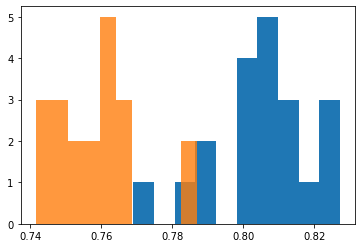

In [19]:
pylab.hist(resultados3), pylab.hist(resultados, alpha=0.8)

In [20]:
np.mean(resultados3)

0.8050486219579784

In [21]:
# CRIAÇÃO DE NOVAS VARIAVEIS PARA ANALISE DE CIENCIA DE DADOS
train['Embarked_S'] = (train['Embarked'] == 'S').astype(int)
train['Embarked_C'] = (train['Embarked'] == 'C').astype(int)
# train['Embarked_Q'] = (train['Embarked'] == 'Q').astype(int)

train['Cabine_nula'] = train['Cabin'].isnull().astype(int)

train['Nome_contem_Miss'] = train['Name'].str.contains("Miss").astype(int)
train['Nome_contem_Mrs'] = train['Name'].str.contains("Mrs").astype(int)

train['Nome_contem_Master'] = train['Name'].str.contains("Master").astype(int)
train['Nome_contem_Col'] = train['Name'].str.contains("Col").astype(int)
train['Nome_contem_Major'] = train['Name'].str.contains("Major").astype(int)
train['Nome_contem_Mr'] = train['Name'].str.contains("Mr").astype(int)

# RETREINAR NOSSO MODELO PARA APLICAR NOSSO TESTE COM A VALIDAÇÃO
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
modelo.fit(X, y)

p = modelo.predict(test[variaveis].fillna(-1))

KeyError: "['Embarked_C', 'Nome_contem_Major', 'Embarked_S', 'Nome_contem_Miss', 'Nome_contem_Mrs', 'Nome_contem_Col', 'Nome_contem_Master', 'Nome_contem_Mr', 'Cabine_nula'] not in index"

In [22]:
# CRIAR INDEXAÇÃO PARA SUBMISSION
sub = pd.Series(p, index=test['PassengerId'], name='Survived')
sub.shape

ValueError: Length of passed values is 445, index implies 418.

In [ ]:
# SALVAR MODELO 
sub.to_csv("modelo_video5.csv", header=True)

In [ ]:
!head -n10 modelo_video5.csv